In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [81]:
data=pd.read_csv('/content/mission7.csv')
data.head(10)

,Soil Type,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level,Plant Species,Thrives
0,Clay,11,10,30,6.1,Lily,Yes
1,Sandy,11,28,26,7.0,Fern,No
2,Clay,6,9,25,5.7,Cactus,Yes
3,Clay,4,24,17,5.5,Fern,Yes
4,Sandy,11,6,20,7.1,Rose,No
5,Sandy,6,10,21,6.0,Cactus,No
6,Clay,6,26,20,5.7,Lily,Yes
7,Loamy,4,15,28,6.5,Cactus,Yes
8,Clay,8,20,28,5.6,Cactus,No
9,Clay,10,20,20,7.7,Cactus,No


In [82]:
data.isna().sum()

,0
Soil Type,0
Sunlight (hours/day),0
Water Supply (liters/week),0
Temperature (Â°C),0
pH Level,0
Plant Species,0
Thrives,0


In [83]:
data.describe()

,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,7.912000,16.670000,22.76600,6.628500
std,2.693606,8.077769,4.94608,0.773962
min,4.000000,5.000000,15.00000,5.500000
25%,6.000000,9.000000,19.00000,6.000000
50%,8.000000,18.000000,23.00000,6.600000
75%,10.000000,24.000000,27.00000,7.300000
max,12.000000,30.000000,30.00000,8.000000


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Soil Type                   1000 non-null   object 
 1   Sunlight (hours/day)        1000 non-null   int64  
 2   Water Supply (liters/week)  1000 non-null   int64  
 3   Temperature (Â°C)           1000 non-null   int64  
 4   pH Level                    1000 non-null   float64
 5   Plant Species               1000 non-null   object 
 6   Thrives                     1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [85]:
le = {}
encoded = ['Soil Type', 'Plant Species']
for col in encoded:
  le[col] = LabelEncoder()
  data[col] = le[col].fit_transform(data[col])

In [86]:
data['Thrives']=data['Thrives'].map({"No":0,'Yes':1})

In [87]:
scall= ['Sunlight (hours/day)', 'Water Supply (liters/week)',
       'Temperature (Â°C)', 'pH Level',]
sc= StandardScaler()
data[scall] = sc.fit_transform(data[scall])

In [88]:
data.head()

,Soil Type,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level,Plant Species,Thrives
0,0,1.146992,-0.826136,1.463304,-0.683192,2,1
1,2,1.146992,1.403317,0.654178,0.480238,1,0
2,0,-0.710184,-0.949995,0.451897,-1.200272,0,1
3,0,-1.453055,0.907883,-1.166355,-1.458812,1,1
4,2,1.146992,-1.321570,-0.559511,0.609508,4,0


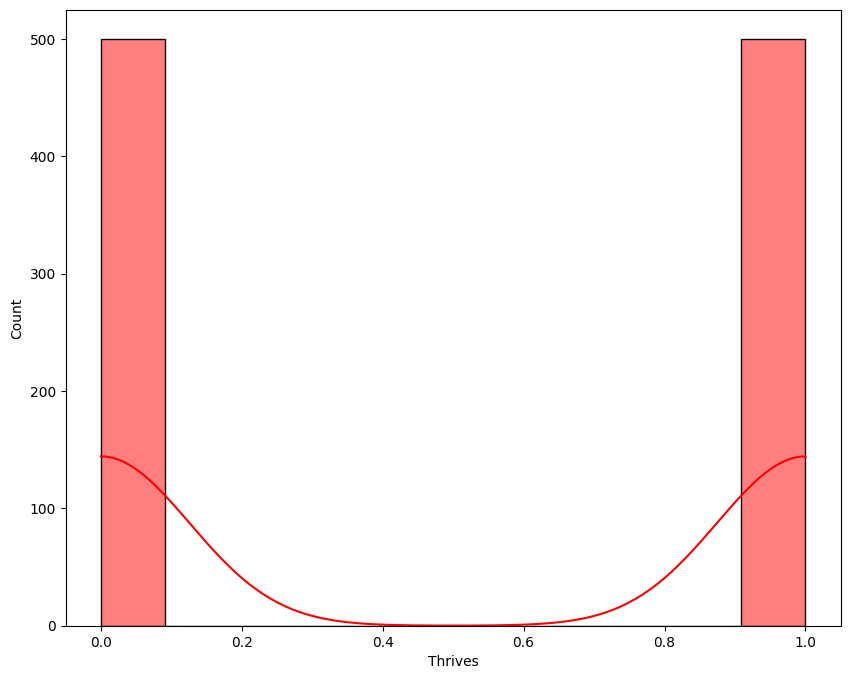

In [89]:
plt.figure(figsize=(10,8))
sns.histplot(data['Thrives'], color="red", kde=True)
plt.title=("Distrubtion of Thrives")
plt.xlabel=("Thrives")
plt.ylabel=("Frequecy")

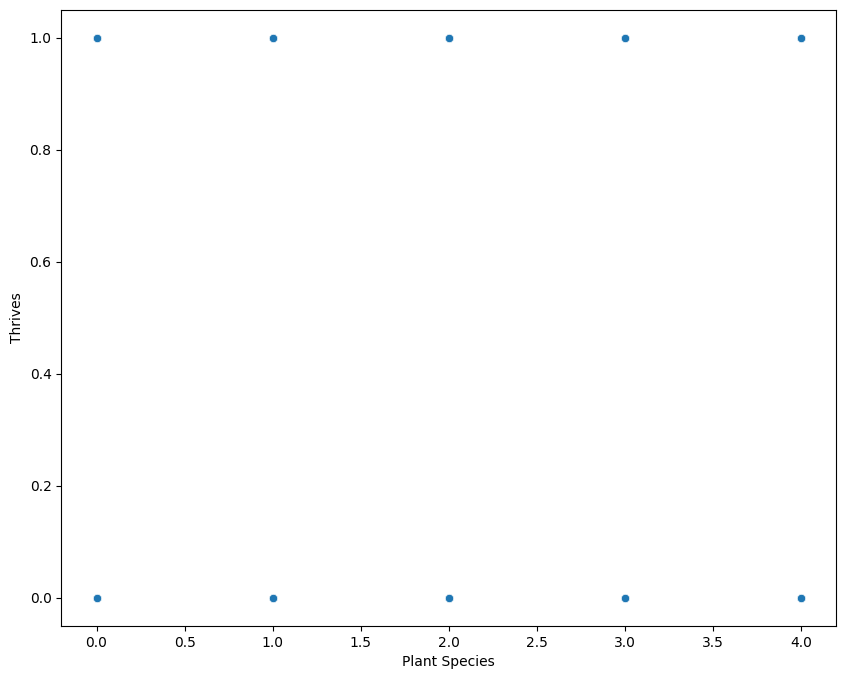

In [90]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Plant Species'], y=data['Thrives'])
plt.title=("Realtion between Plant Species and target")
plt.xlabel=('Plant Species')
plt.ylabel=('Thrives')

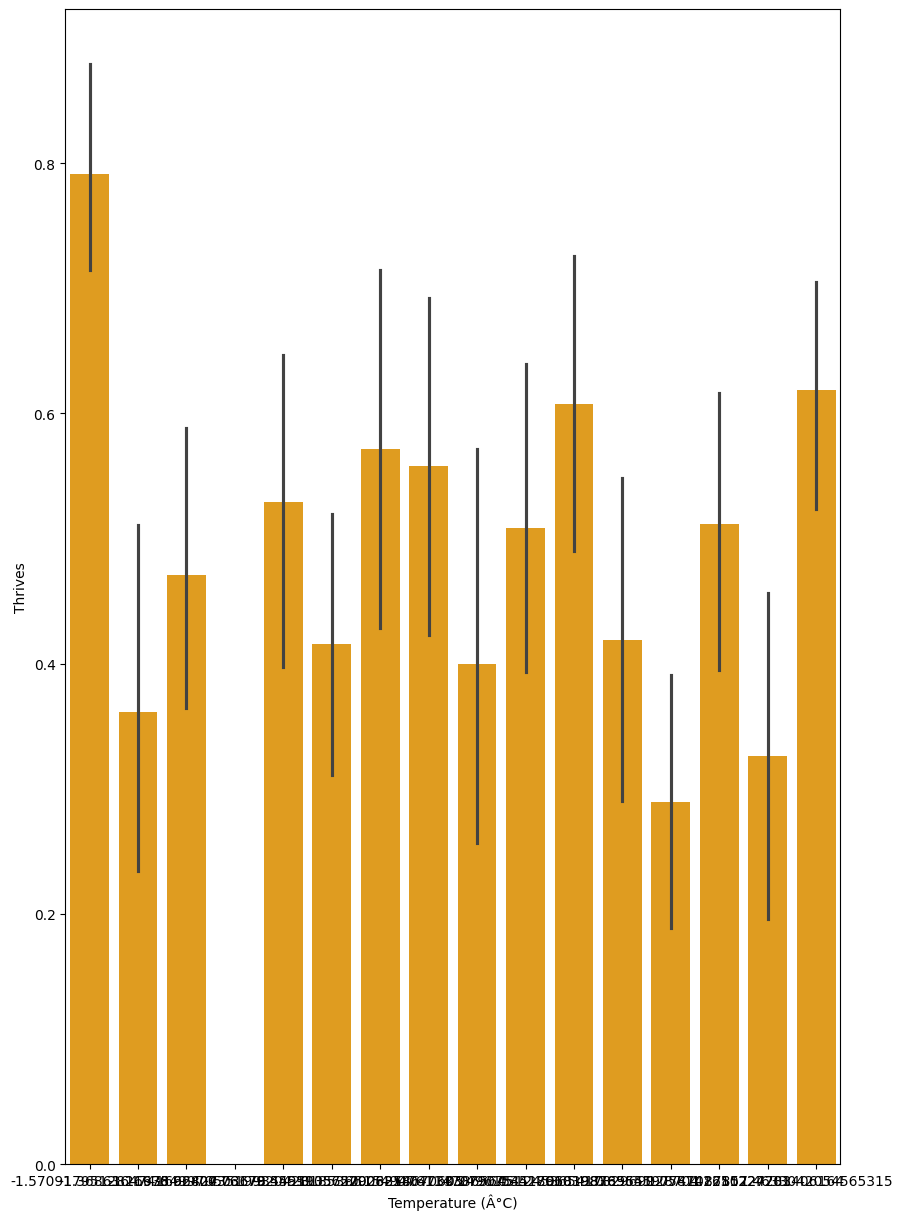

In [91]:
plt.figure(figsize=(10, 15))
sns.barplot(x=data['Temperature (Â°C)'], y= data['Thrives'], color="orange")
plt.xlabel=('tem')
plt.ylabel=('Thrives Risk')

In [92]:
x = data.drop('Thrives', axis=1)
y = data['Thrives']

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [94]:
lr  = LogisticRegression()
de = DecisionTreeClassifier()


In [95]:
lr.fit(x_train, y_train)


LogisticRegression()

In [96]:
de.fit(x_train, y_train)


DecisionTreeClassifier()

In [97]:
y_pred_lr = lr.predict(x_test)
y_pred_de = de.predict(x_test)

In [98]:
print("accuracy = ", accuracy_score(y_test, y_pred_lr))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_lr))
print("classfication report:", classification_report(y_test, y_pred_lr))

accuracy =  0.695
Confusion matrix: [[64 33]
 [28 75]]
classfication report:               precision    recall  f1-score   support

           0       0.70      0.66      0.68        97
           1       0.69      0.73      0.71       103

    accuracy                           0.69       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.70      0.69      0.69       200



In [99]:
print("accuracy = ", accuracy_score(y_test, y_pred_de))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_de))
print("classfication report:", classification_report(y_test, y_pred_de))


accuracy =  0.985
Confusion matrix: [[ 94   3]
 [  0 103]]
classfication report:               precision    recall  f1-score   support

           0       1.00      0.97      0.98        97
           1       0.97      1.00      0.99       103

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



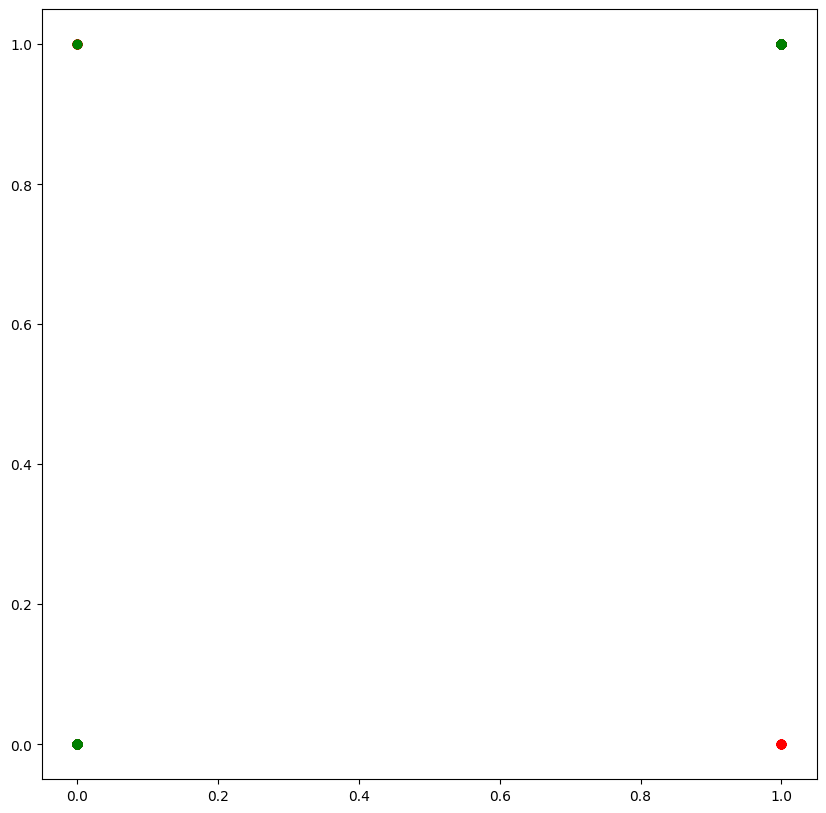

In [100]:
plt.figure(figsize=(10, 10))
plt.scatter(x = y_test, y = y_pred_lr, color="red" )
plt.scatter(x = y_test, y = y_pred_de, color="green")



In [101]:
grid_params = {'max_iter': [1000, 2000, 3000]}
grid_model = GridSearchCV(lr,grid_params, cv=5)
grid_model.fit(x_train, y_train)
print(grid_model.best_params_)
grid_model.best_score_

{'max_iter': 1000}


np.float64(0.61875)

In [102]:
random_param = {'max_depth': [5,10, 20, 30, 40, 50]}

random_model = RandomizedSearchCV(de,random_param, cv=5)

random_model.fit(x_train, y_train)
print(random_model.best_params_)
random_model.best_score_

{'max_depth': 20}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


np.float64(1.0)

In [103]:
!pip install gradio

In [104]:
import gradio as gr


In [108]:
def Thrived(st, sl,ws, t, ph, ps):
   try:
    input_data = pd.DataFrame(
        {
            "Soil Type": [st],
            "Sunlight (hours/day)": [sl],
            "Water Supply (liters/week)": [ws],
            "Temperature (Â°C)": [t],
            "pH Level": [ph],
            "Plant Species": [ps]
        })
    for col in encoded:
      input_data[col] = le[col].transform(input_data[col])
    input_data[scall] = sc.transform(input_data[scall])
    prediction = de.predict(input_data)
    if prediction[0] == 1:
      return "yes"

    else:
      return "No "

    return f"predict Thrived: ${prediction[0]:,.2f}"
   except Exception as e:
    return str(e)
gr.Interface(
    fn = Thrived,
    inputs = [
        gr.Dropdown(choices=['Clay', 'Sandy', 'Loamy']),
        gr.Number(label="Sunlight (hours/day)"),
        gr.Number(label="Water Supply (liters/week)"),
        gr.Number(label="Temperature (Â°C)"),
        gr.Number(label="pH Level"),
        gr.Dropdown(choices = ['Fern', 'Cactus', 'Rose', 'Lily', 'Oak'])
    ],
     outputs= gr.Textbox(label="Prediction")

).launch()






It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0fbd4a272a093b7a4d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
